In [1]:
from lenskit import topn
from lenskit.metrics.topn import ndcg
import pandas as pd
from matplotlib import pyplot as plt
from lenskit.metrics.predict import rmse
from IPython.display import set_matplotlib_formats

# Analyze 
all_recs = pd.read_csv('movielens_output/ii/recs.csv')
test_data = pd.read_csv('movielens_output/ii/testdata.csv')
preds = pd.read_csv('movielens_output/ii/preds.csv')
all_recs.head()

,item,score,user,rank,Algorithm
0,1191,4.882301,2,1,ii
1,1594,4.809833,2,2,ii
2,169,4.798452,2,3,ii
3,427,4.795447,2,4,ii
4,479,4.739378,2,5,ii


In [2]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
results = rla.compute(all_recs, test_data)
results.head()

,,nrecs,ndcg
user,Algorithm,,
1,ii,100.0,0.195993
2,ii,100.0,0.112846
3,ii,100.0,0.000000
4,ii,100.0,0.057101
5,ii,100.0,0.215693


In [3]:
results.groupby('Algorithm').ndcg.mean()

Algorithm
ii    0.102444
Name: ndcg, dtype: float64

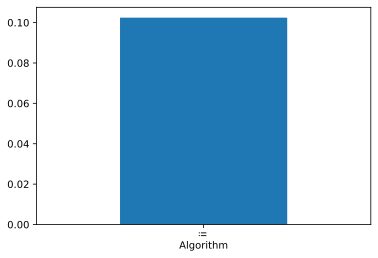

In [4]:
set_matplotlib_formats('svg')
results.groupby('Algorithm').ndcg.mean().plot.bar()

In [5]:
user_rmse = preds.groupby('user').apply(lambda df: rmse(df.prediction, df.rating)).mean()
print(user_rmse)

0.770897627496518
